In [54]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("operations.csv")

In [56]:
df

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


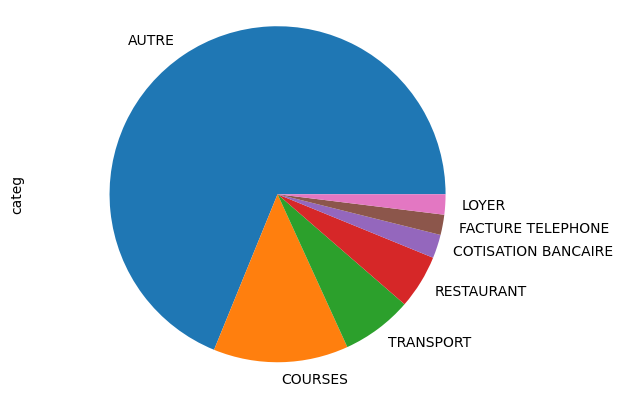

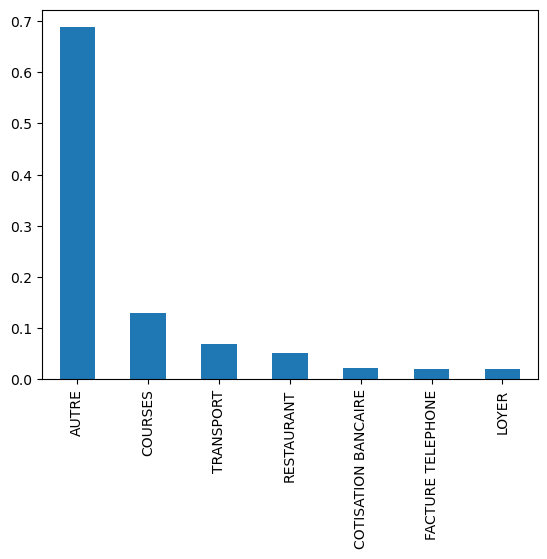

In [57]:
# Diagramme en secteurs
df["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [58]:
df['date_operation'] = pd.to_datetime(df['date_operation'])

In [59]:
df['quart_mois'] = [int((jour-1)*4/31)+1 for jour in df["date_operation"].dt.day]

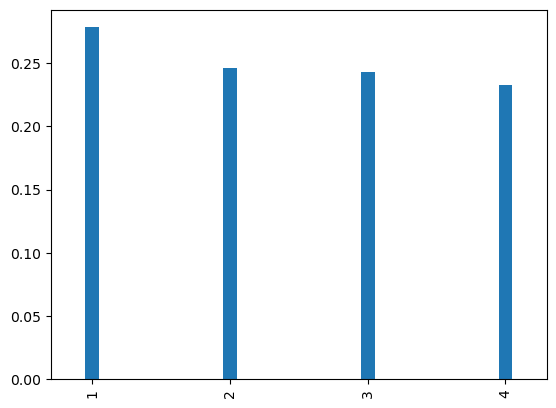

In [60]:
# Diagramme en bâtons
df["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

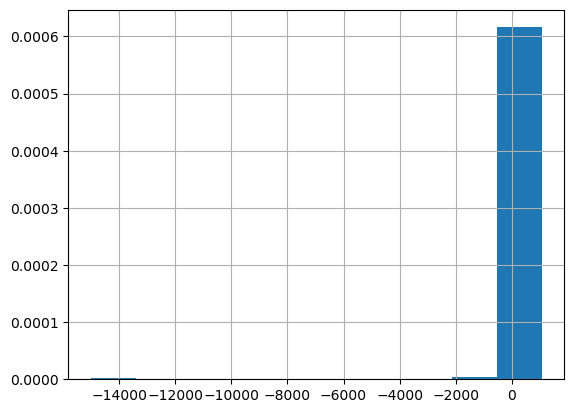

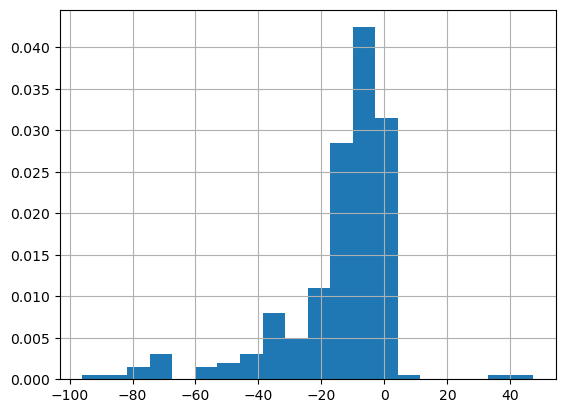

In [61]:
# Histogramme
df["montant"].hist(density=True)
plt.show()

# Histogramme plus beau
df[df.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

In [71]:
effectifs = df["quart_mois"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(df) # len(data) renvoie la taille de l'échantillon
display(tab)

,quart_mois,n,f
0,1,86,0.278317
1,2,76,0.245955
2,3,75,0.242718
3,4,72,0.233010


In [70]:
tab = tab.sort_values("quart_mois") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
display(tab)

,quart_mois,n,f,F
0,1,86,0.278317,0.278317
1,2,76,0.245955,0.524272
2,3,75,0.242718,0.766990
3,4,72,0.233010,1.000000


In [ ]:
df['montant'].mode()

In [ ]:
df['montant'].mean()

In [ ]:
df['montant'].median()

--------------------
AUTRE
moy:
 -47.42071090047393
med:
 -8.14
mod:
 0   -1.6
Name: montant, dtype: float64


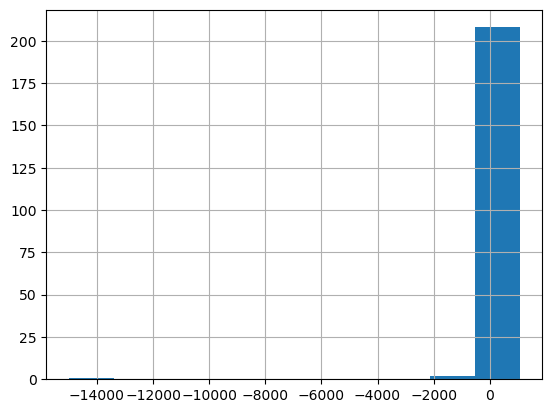

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64


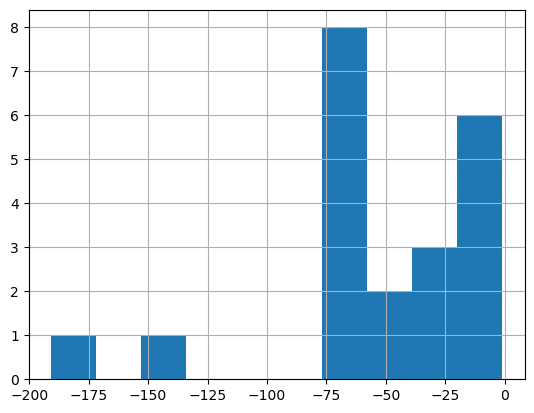

--------------------
FACTURE TELEPHONE
moy:
 -7.973333333333333
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64


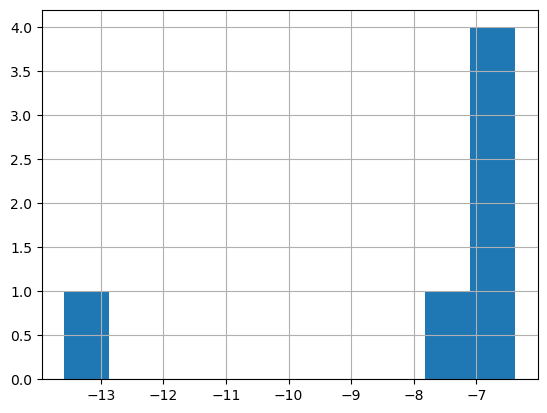

--------------------
COURSES
moy:
 -16.497435897435896
med:
 -12.24
mod:
 0   -32.67
Name: montant, dtype: float64


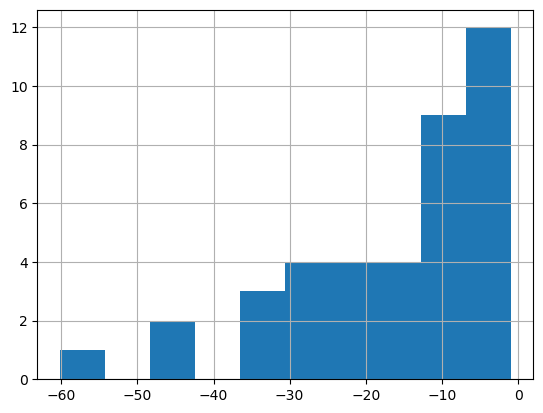

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64


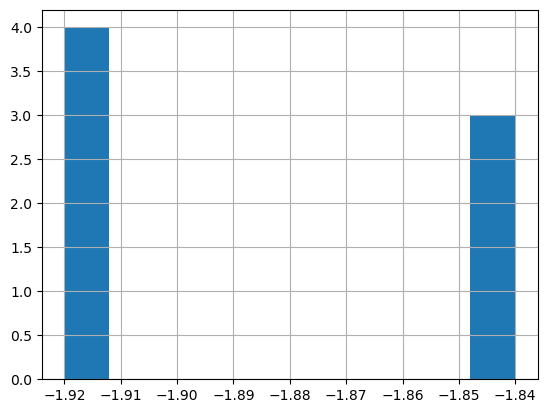

--------------------
RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64


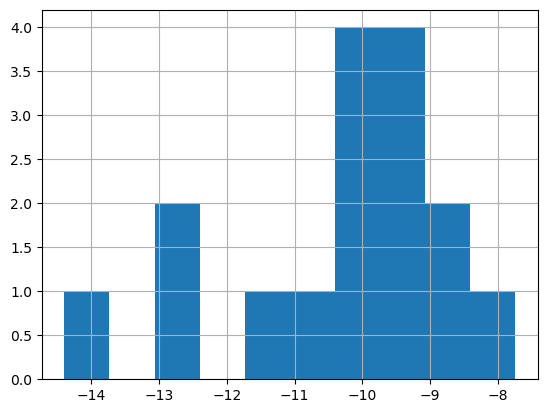

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64


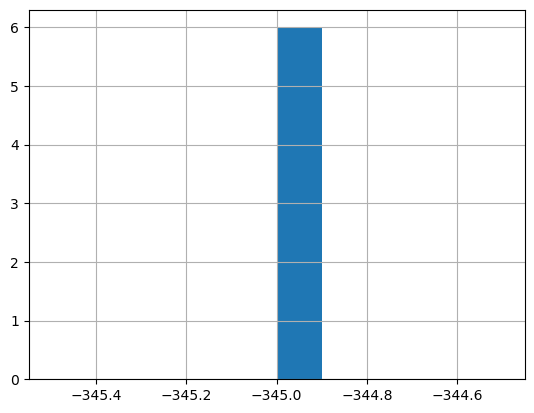

--------------------
nan
moy:
 nan
med:
 nan
mod:
 Series([], Name: montant, dtype: float64)


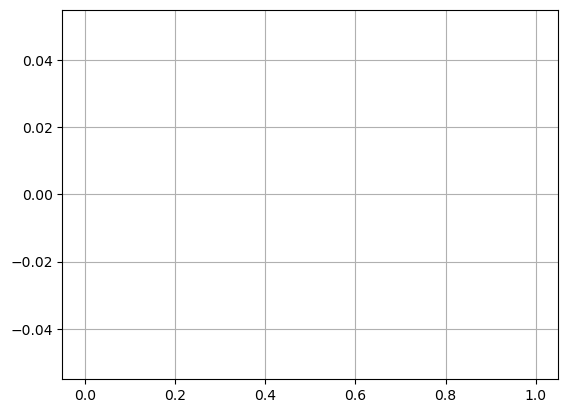

In [78]:
for cat in df["categ"].unique():
    subset = df.loc[df.categ == cat, :] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    subset["montant"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme

In [79]:
df['montant'].var()

764296.6351545885

In [80]:
df['montant'].var(ddof=0)

761807.0695677658

In [81]:
df['montant'].std()

874.2406048420472

In [82]:
df['montant'].var(ddof=0)

761807.0695677658

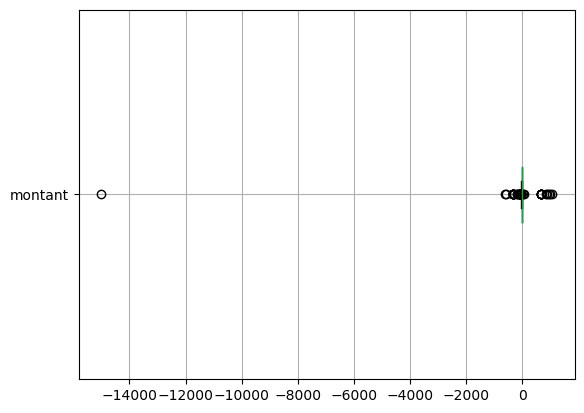

In [83]:
df.boxplot(column="montant", vert=False)
plt.show()

--------------------
AUTRE
moy:
 -47.42071090047393
med:
 -8.14
mod:
 0   -1.6
Name: montant, dtype: float64
var:
 1105245.348746888
ect:
 1051.3064961022965


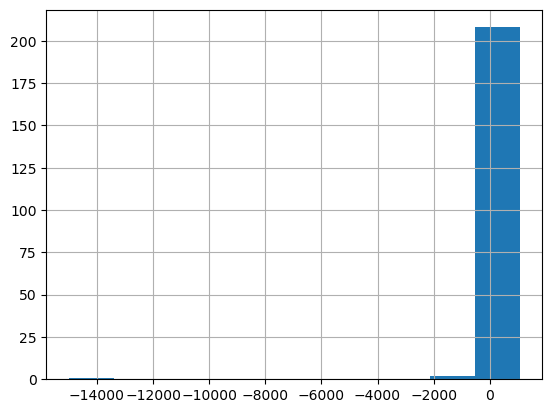

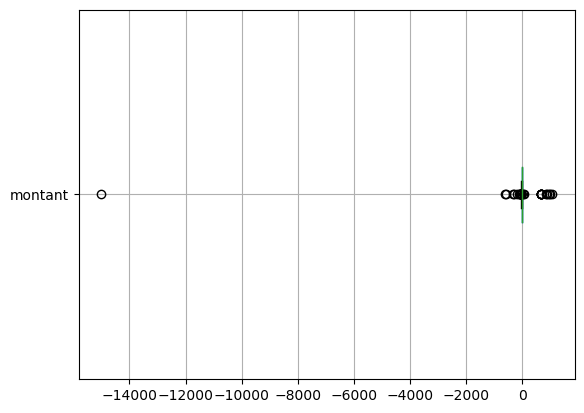

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64
var:
 2205.016868027212
ect:
 46.95760713694014


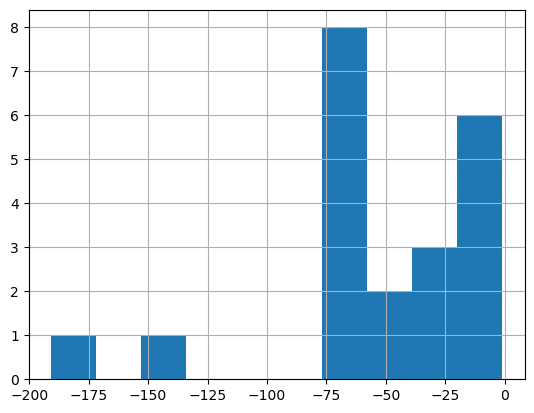

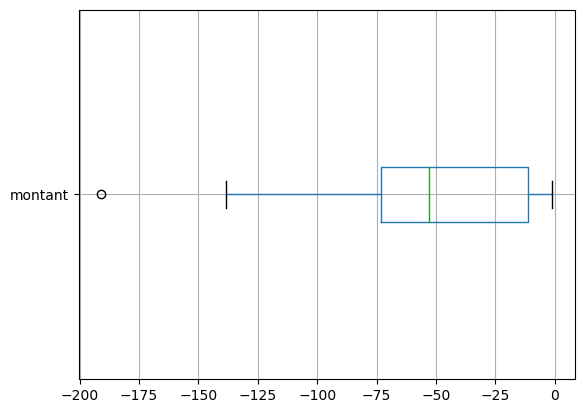

--------------------
FACTURE TELEPHONE
moy:
 -7.973333333333333
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64
var:
 6.432222222222222
ect:
 2.536182608216968


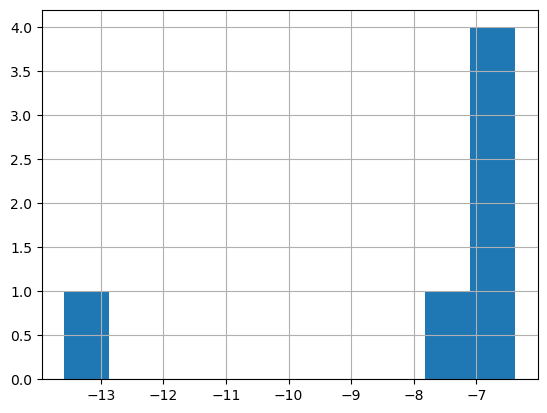

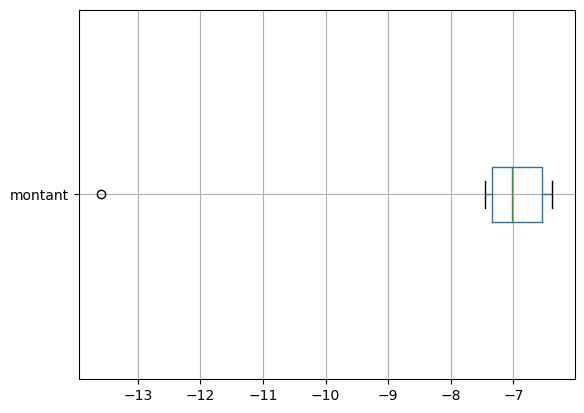

--------------------
COURSES
moy:
 -16.497435897435896
med:
 -12.24
mod:
 0   -32.67
Name: montant, dtype: float64
var:
 181.14957804076266
ect:
 13.4591819231617


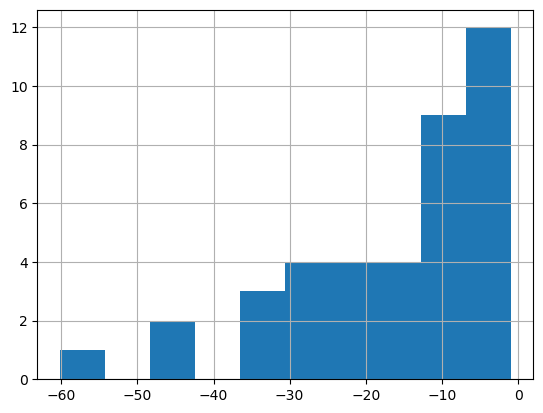

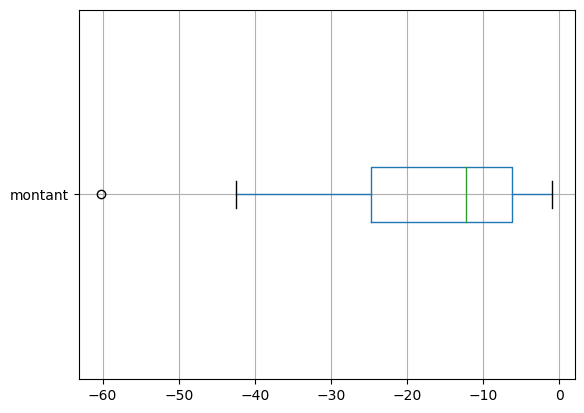

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141


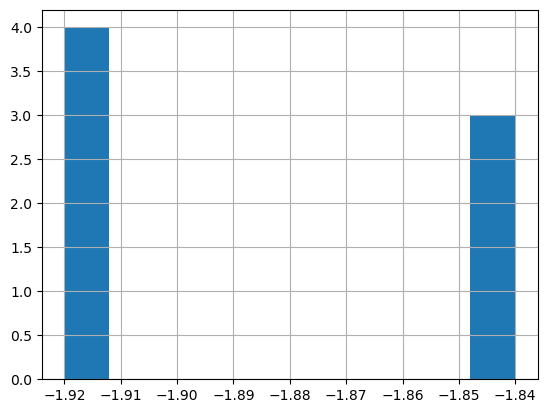

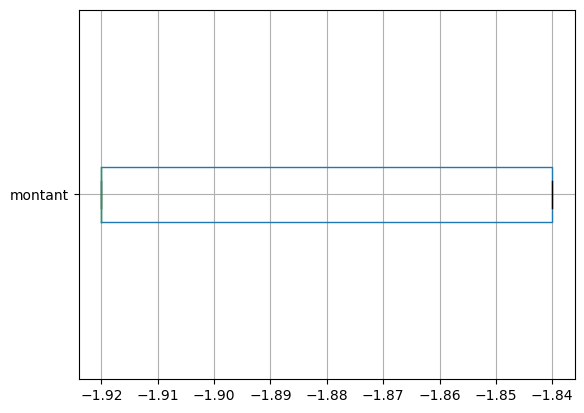

--------------------
RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64
var:
 2.853193750000001
ect:
 1.689139943876765


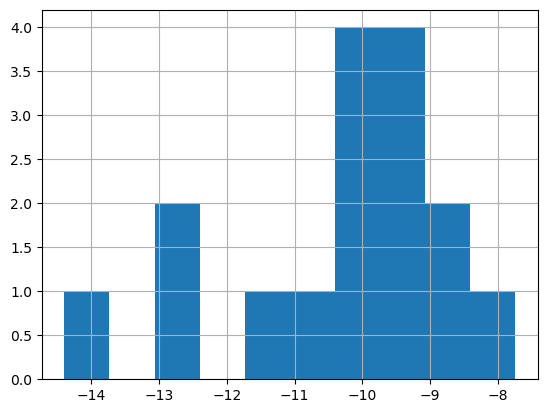

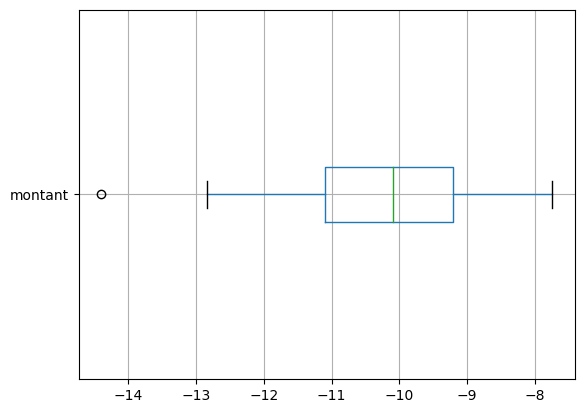

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64
var:
 0.0
ect:
 0.0


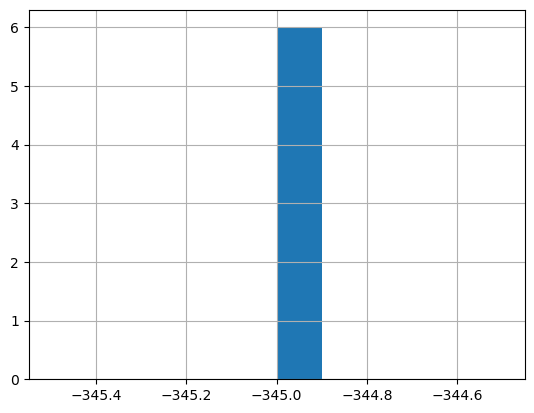

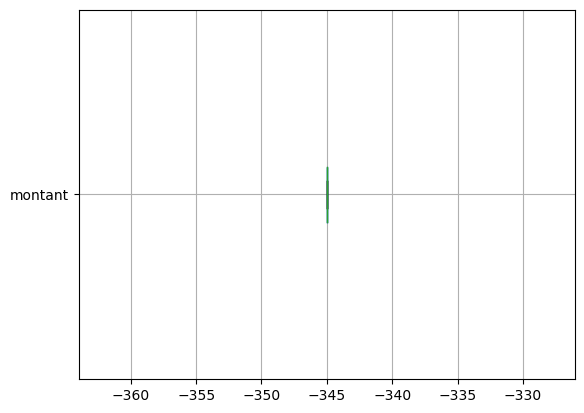

--------------------
nan
moy:
 nan
med:
 nan
mod:
 Series([], Name: montant, dtype: float64)
var:
 nan
ect:
 nan


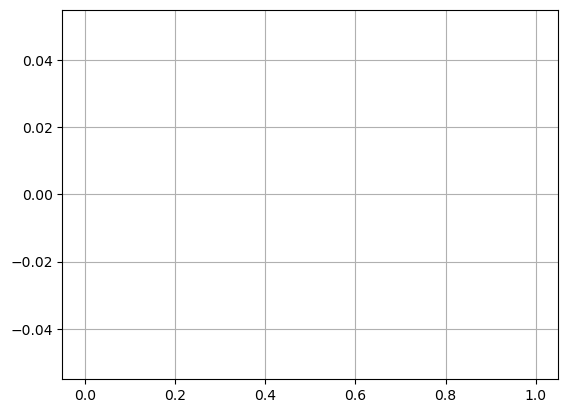

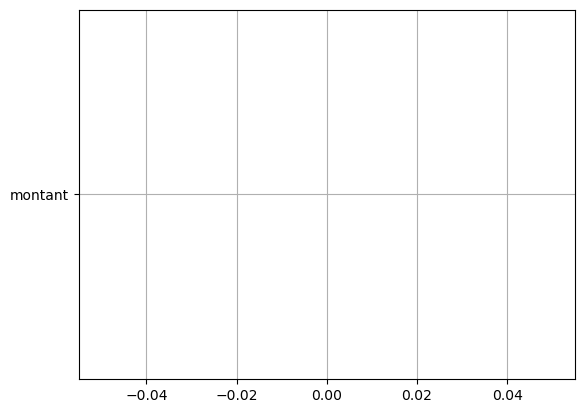

In [84]:
for cat in df["categ"].unique():
    subset = df[df.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=0))
    print("ect:\n",subset['montant'].std(ddof=0))
    subset["montant"].hist()
    plt.show()
    subset.boxplot(column="montant", vert=False)
    plt.show()

In [72]:
df['montant'].skew()

-16.42821460420292

In [74]:
df['montant'].kurtosis()

282.31637060086683

--------------------
AUTRE
moy:
 -47.42071090047393
med:
 -8.14
mod:
 0   -1.6
Name: montant, dtype: float64
var:
 1105245.348746888
ect:
 1051.3064961022965
skw:
 -13.703828821717531
kur:
 195.59900832269122


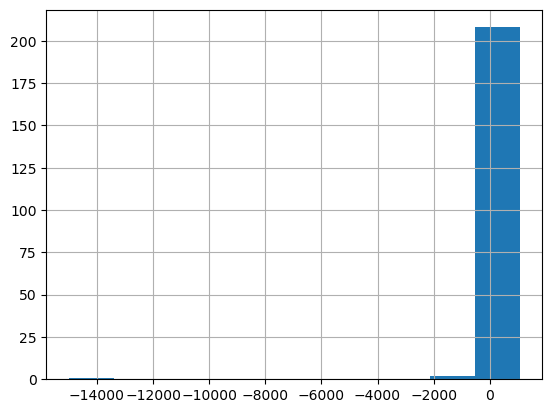

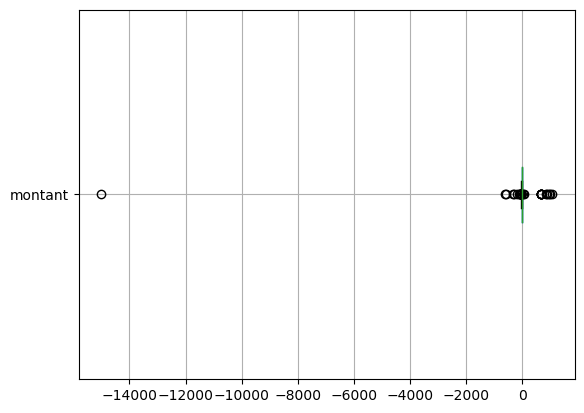

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64
var:
 2205.016868027212
ect:
 46.95760713694014
skw:
 -1.248265076217821
kur:
 2.1922705326917495


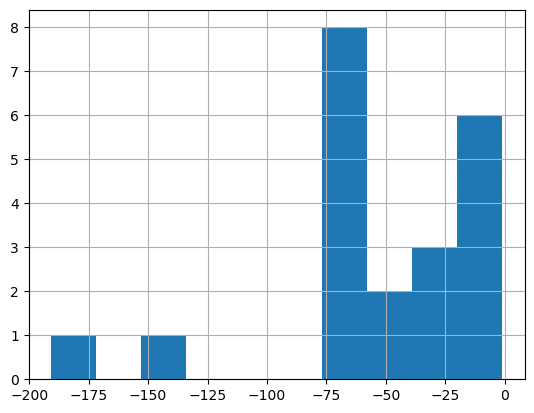

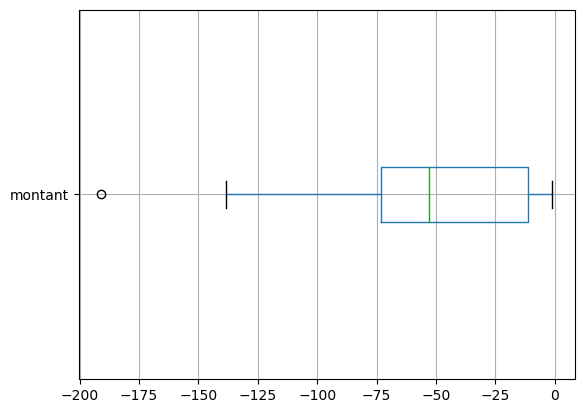

--------------------
FACTURE TELEPHONE
moy:
 -7.973333333333333
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64
var:
 6.432222222222222
ect:
 2.536182608216968
skw:
 -2.3262852094198623
kur:
 5.531681192471323


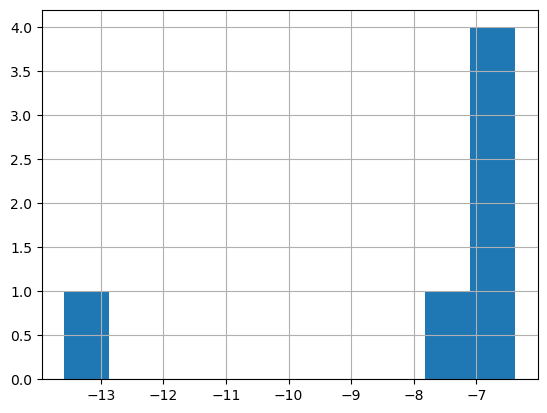

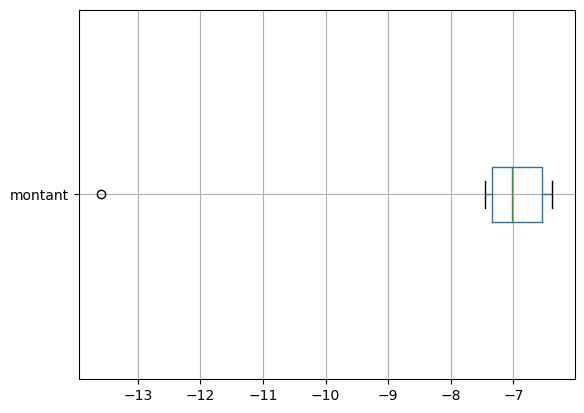

--------------------
COURSES
moy:
 -16.497435897435896
med:
 -12.24
mod:
 0   -32.67
Name: montant, dtype: float64
var:
 181.14957804076266
ect:
 13.4591819231617
skw:
 -1.2040932608409276
kur:
 1.3774708176939345


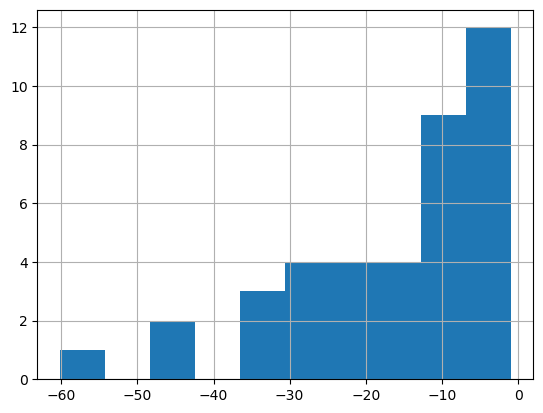

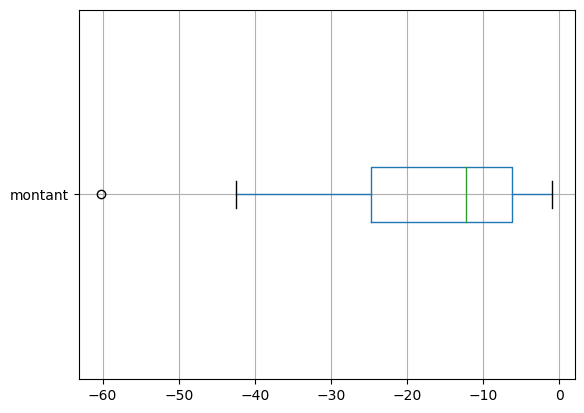

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141
skw:
 0.37416573867739106
kur:
 -2.800000000000003


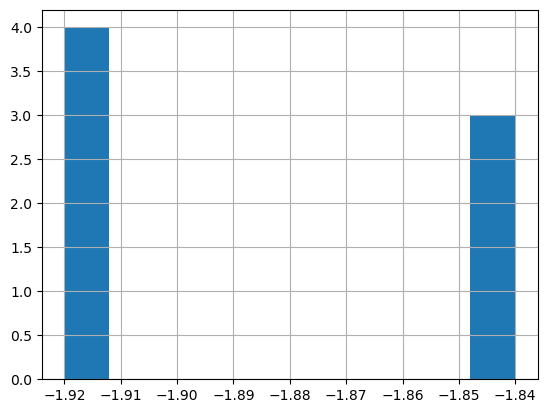

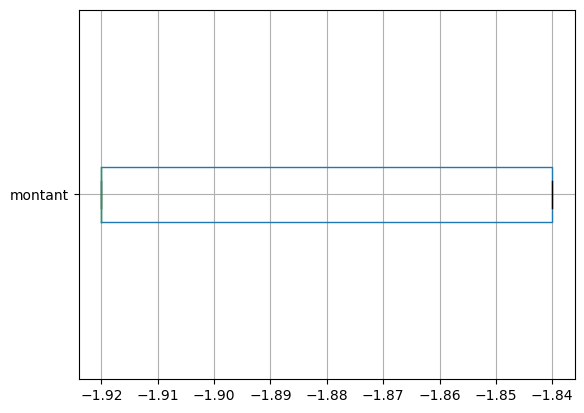

--------------------
RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64
var:
 2.853193750000001
ect:
 1.689139943876765
skw:
 -0.8883503487158837
kur:
 0.5988855591691937


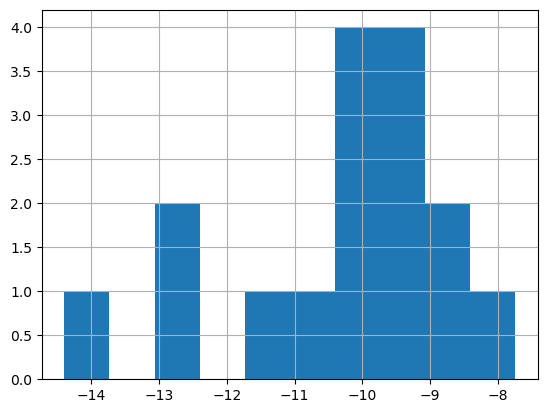

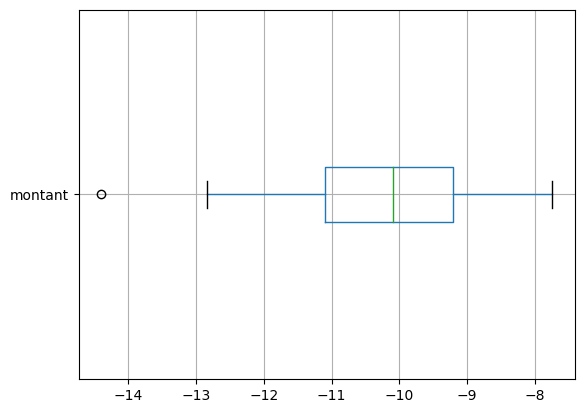

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64
var:
 0.0
ect:
 0.0
skw:
 0
kur:
 0


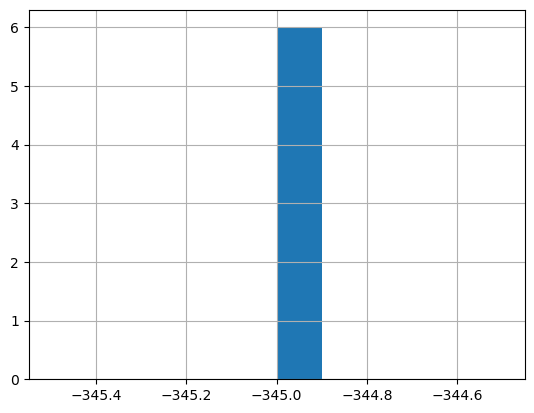

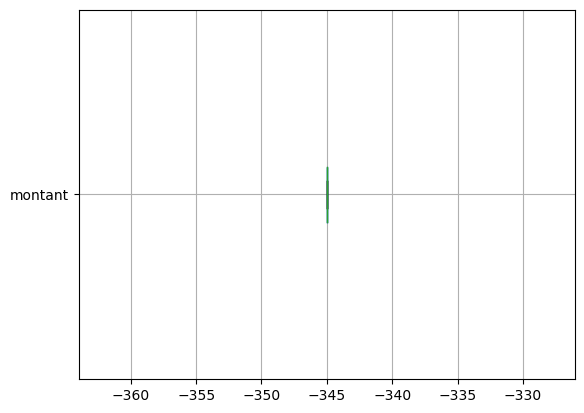

--------------------
nan
moy:
 nan
med:
 nan
mod:
 Series([], Name: montant, dtype: float64)
var:
 nan
ect:
 nan
skw:
 nan
kur:
 nan


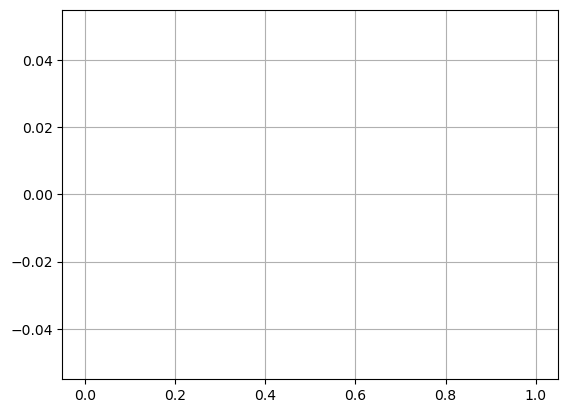

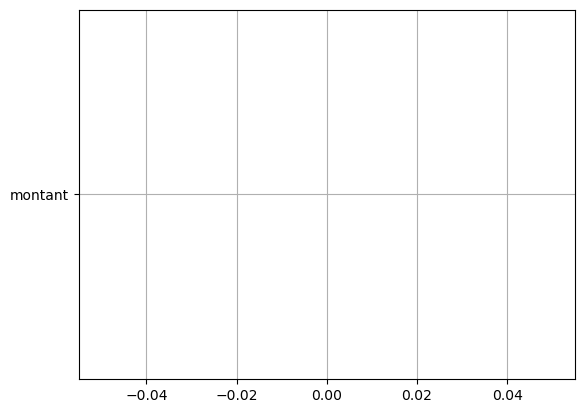

In [76]:
for cat in df["categ"].unique():
    subset = df[df.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=0))
    print("ect:\n",subset['montant'].std(ddof=0))
    print("skw:\n",subset['montant'].skew())
    print("kur:\n",subset['montant'].kurtosis())
    subset["montant"].hist()
    plt.show()
    subset.boxplot(column="montant", vert=False)
    plt.show()